TD-IDF - Recommender System
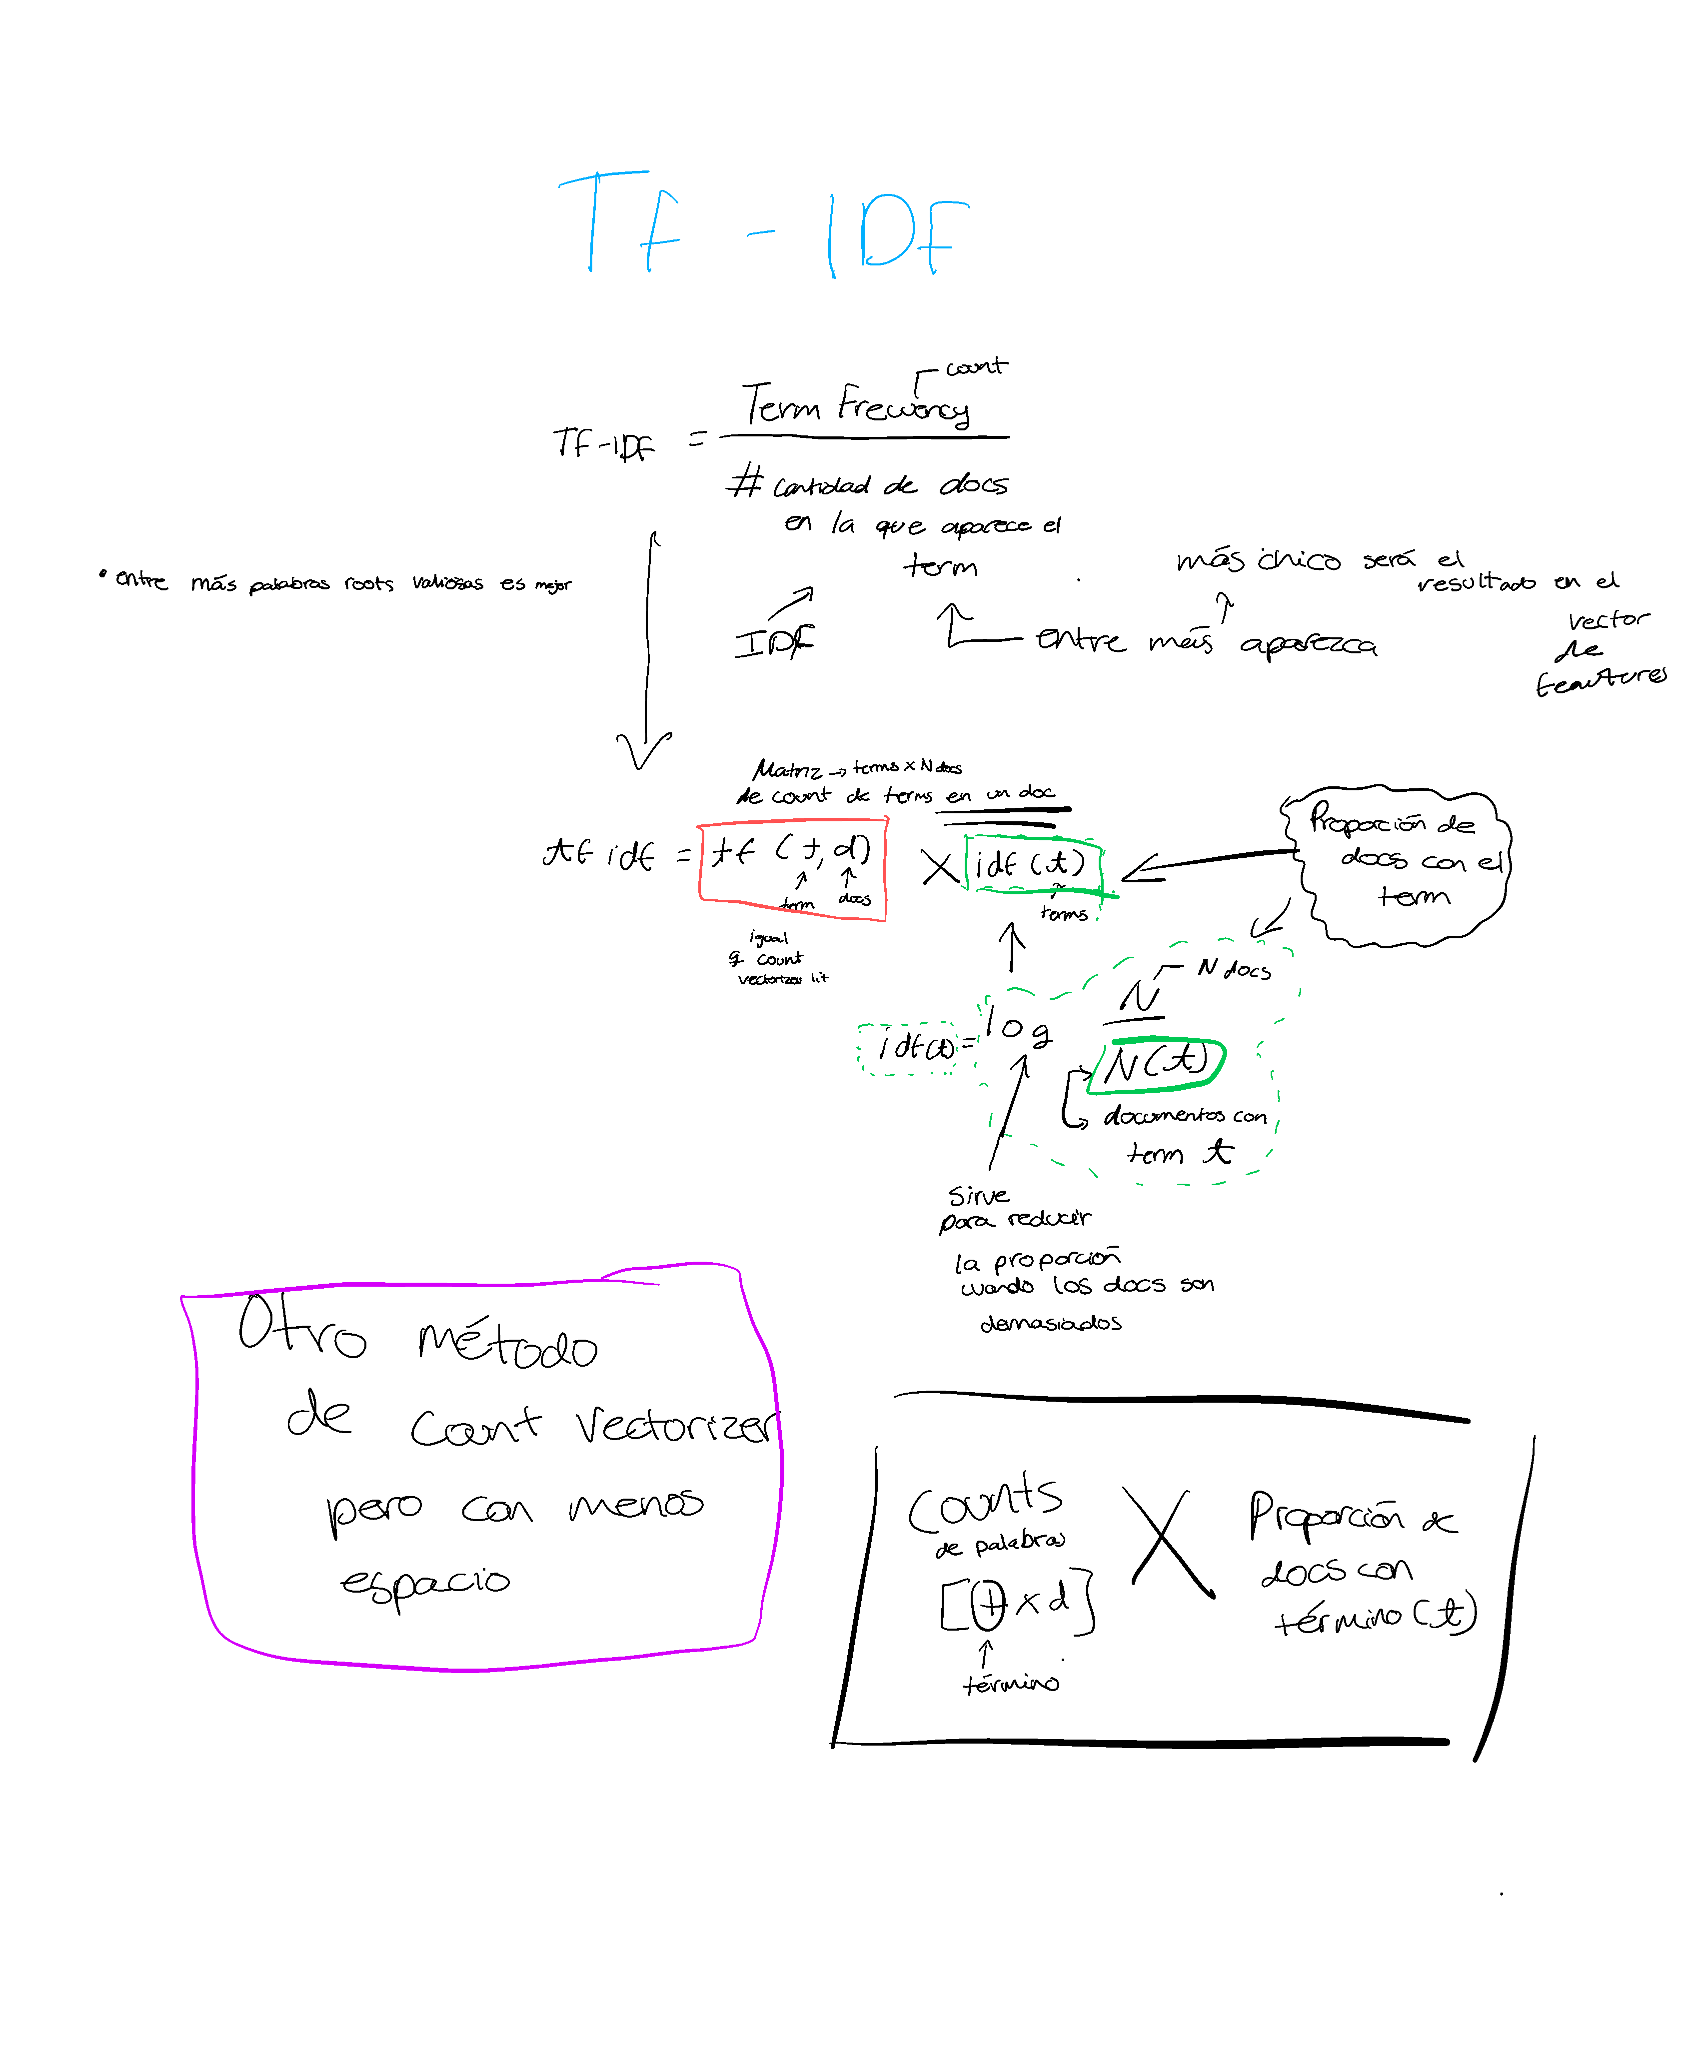

In [6]:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
#!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
import pandas as pd
import matplotlib.pyplot as plt
import json
#iMPORTADO DE  SKLEARN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
#imprime primera fila
x = df.iloc[0]
x

 

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [8]:
#Te puedas dar cuenta que es te es un json 
x['genres']
 


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [9]:
x['keywords' ]


'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [10]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [11]:
#j es una lista
#se itera en la lsita con jj
#queremos el valor de name 
#Considerando que existen generos "Science Fiction" quremos juntarlos asi -> "ScienceFiction
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

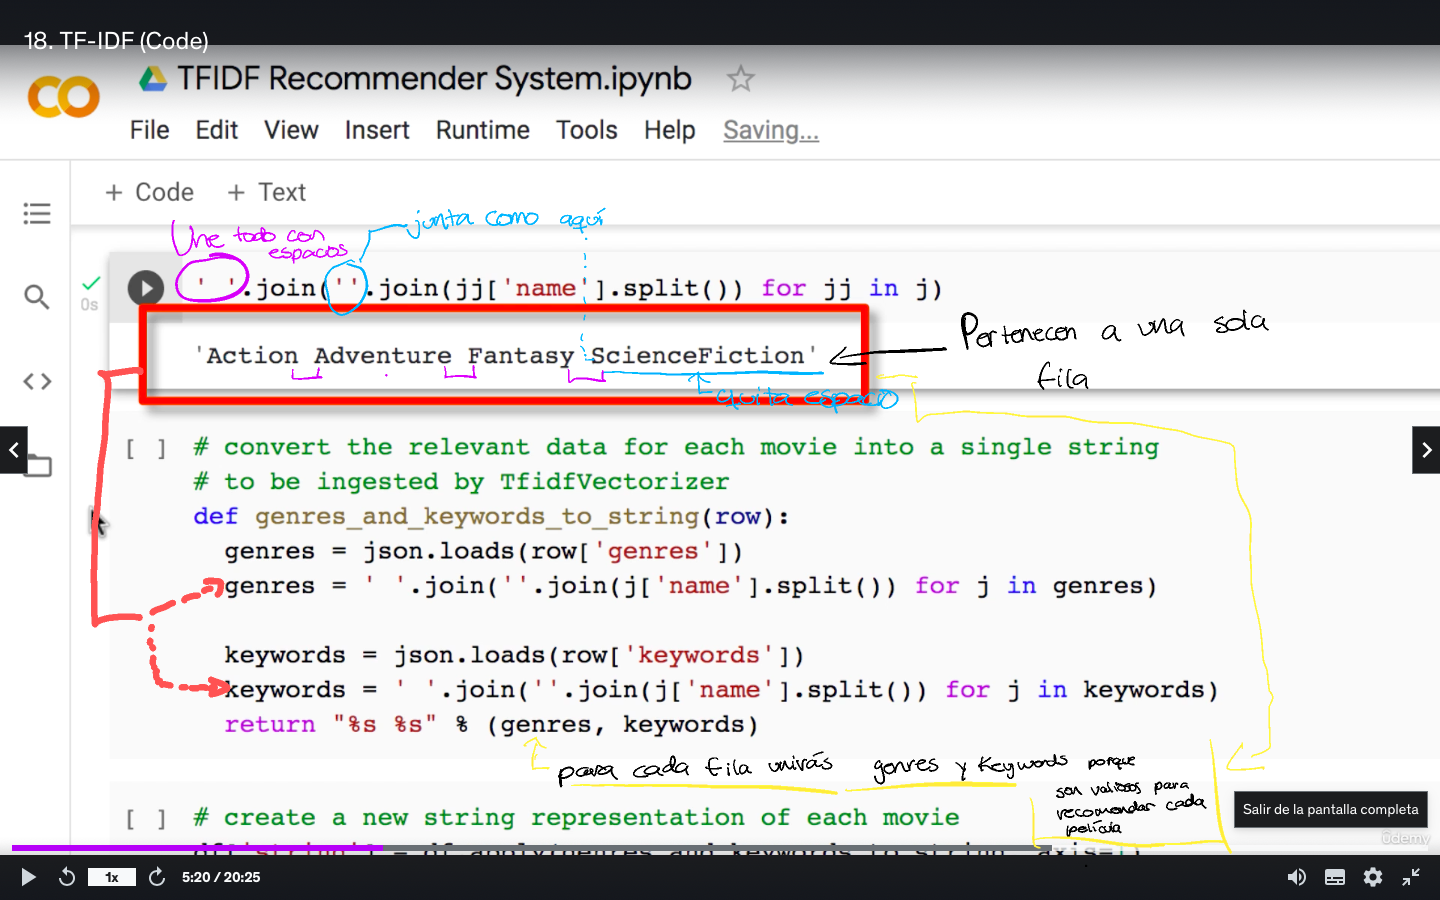

In [12]:
def genres_and_keywords_to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)
    keywords = json.loads(row['keywords'])
    keywords =' '.join(''.join(j['name'].split()) for j in keywords)
    return "%s %s" % (genres, keywords)

In [13]:
#En una nueva columna llamada string llamaras la funcion de arriba se ejecutara para cada row
#Llenando la columna de genres y keywords para el entrenamiento
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

In [14]:
#Recuerda que tfidf es una matriz entonces estas diciendo que no pdora tener mas de 2000 columnas
#keeping the ,ost frecuent terms in the corpus
tfidf = TfidfVectorizer (max_features=2000)

In [15]:
#vamos crear una matriz de tdidf con la columna que creamos arriba
x = tfidf.fit_transform(df["string"])

In [16]:
#sparse matrix de 4803x2000 gracias a qur hici,os drop a less frecuent term
x

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [17]:
# crea un df con el titulo de las peliculas como index
movies2idx = pd.Series(df.index , index = df["title"])



In [18]:
#index de donde esta la pelicula que nos servira abajo
idx = movies2idx["Scream 3"]

idx

1164

In [19]:
#el index nos esta sirviendo para jalar la fila correspondiente a la pelicula de la matriz
#de tdidf
query = x[idx]
query
#una fila con dos mil columnas

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

Para poder ver lo que hay en una fila de una matriz: Importante para comprendimiento

In [20]:
query.toarray()
#la mayoria de los valores son cero

array([[0., 0., 0., ..., 0., 0., 0.]])

Encontrar similarity

In [21]:
#Encontrar similaridad entre el query, o sea Scream 3 y every vector in x
scores = cosine_similarity(query, x)
scores
#Fila de 1 row contra las 4800 peliculas que hay

array([[0., 0., 0., ..., 0., 0., 0.]])

Flatten -> Flat el array para convertirlo en uno de una sola dimension o sea 1 columna, 4800 filas

In [22]:
scores = scores.flatten()

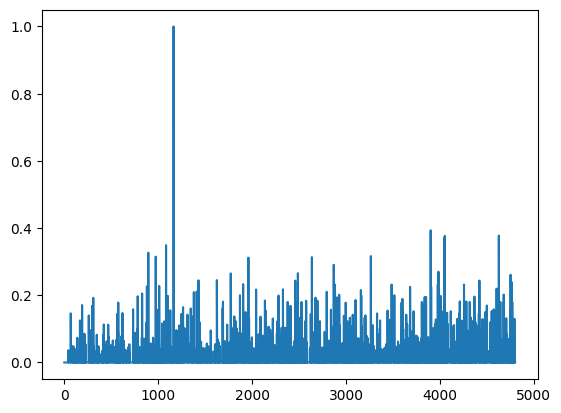

In [23]:
plt.plot(scores)

As we can observe in the chart the absolute value of 1 is the same movie since the index is 1400 something-

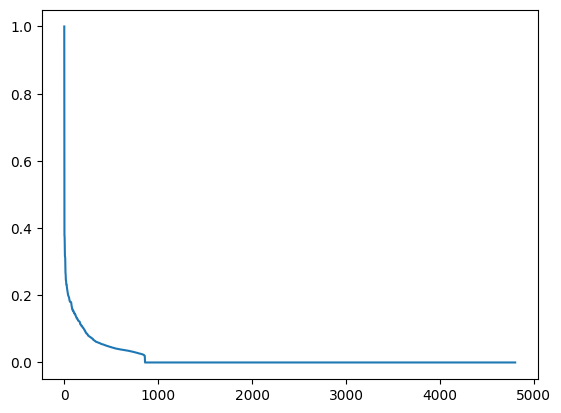

In [24]:
#Ahora graficaremos la similaridad en orden descendiente ya que nos interesan los que
#sean mas similares
#debemos graficarlos asi ya que queremos los scores ordenadas descendentemente
plt.plot(scores[(-scores).argsort()])

The closest to 1 are the most similar matches

Take the Top 5 matches (exlucding self movie, that is why we are not going from 0)

In [25]:
#We are only taking the indeces
recommended_idx = (-scores).argsort()[1:6]

Recuerda que con iloc obtienes accedes a columnas de una data frame de pandas

In [26]:
df["title"].iloc[recommended_idx]

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

REAL APPLICATION: Create a function that receives a title and returns recommendations
- This function could easily be used in a real application, it can be called on the front end of netflix and it would go and look on the database for recommendations

In [27]:
def recommend(title):
    #get the row index for the title
    idx = movies2idx[title]
    #en caso de que existan varios index para la misma pelicula en idx se guardara
    #un pd.Series que es practicamente como un array con varios indices
    if type(idx) == pd.Series:
        #entonces solo se agarrara el primer title porque los demas son solo repetidos
        idx = idx.iloc[0]
        #Yo haria drop a los demas titulos si tienen el mismo titulo
    
    #calcular los scores de similaridad del title actual contra todas las pelioculas
    query = x[idx]
    scores = cosine_similarity(query, x)
    
    # le hacemos flat al array the scores
    scores = scores.flatten()
    recommended_idx = (-scores).argsort()[1:6]
    return df["title"].iloc[recommended_idx]
    
    

Trying the function

In [29]:
print("Recommendations for 'Avatar':")
print (recommend('Avatar'))

Recommendations for 'Avatar':
47      Star Trek Into Darkness
3214                 Barbarella
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
Name: title, dtype: object


My conclusions - Matias Mendez

Alternatives, note that I used tdidf for this recommender system but we could also use:
- count vectors and its variants
- we could make this also simpler dropping duplicates
- we could use clustering instead of cosine similarity
- we could also use more parameters tod etermine the cosine similarity, like just looking at the df we could add popularity, release date, make a count vectorizer for overview, basically the limit is imagination

Note that in my case I tried getting recommendations for Avatar and the movie "A monster in paris" does not seem similar at all